# Kaggle Tutorial on EDA & Machine Learning

I'm using DataCamp's Kaggle-based tutorial on exploratory data analysis on the Titantic data to learn to how apply my own machine learning model to the NIH PDF dataset I'll be working on this summer.

The goal of this algorithm is to predict whether any given passenger on the Titanic survived or not given the data on them like the fare they paid, where they embarked, and their age.

## A Few Notes on the Project
__Supervised learning__ is the branch of ML that involves predicting labels - labels being 'Survived,' or 'Not,'. Models can learn from labelled data - which is the information that includes whether a passenger survived (this is called model training) and then predict based on unlabelled data. 

__Kaggle__ is a platform for predictive modelling and analytics competitions. On Kaggle, they have train and test sets becuase I want to build a model that learns patterns in the training set and the model then makes predictions on the test set. Kaggle then tells me the percentage I got correct, which is my model's accuracy. 

__Exploratory Data Analysis__ basically just involves importing my data and checking it out. I can do this using Python's package pandas. 

In [3]:
# Import Modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
import os 

In [4]:
# Figures inline and set visualization style
%matplotlib inline
sns.set()

## Exercise One - The EDA

In this section, I'm going to be exploring the data that's provided to me by Kaggle. Below, I will outline a step-by-step process on how to do that:
1. Import the train and test datasets and use pandas to look at the data
2. Visualize the data with Seaborn 

### Part One - Importing the Data

In [15]:
# Import the test and train datasets 
df_train = pd.read_csv(os.path.join('data', 'train.csv'))
df_test = pd.read_csv(os.path.join('data', 'test.csv'))
# NOTE: adding an 'index_col=0' argument sets the first col to the index

# View the first five lines of training data with this command
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# Now I'm looking at which types of data there are
df_train.info()
# NOTE: there are plenty of missing values for 'Age' and 'Cabin'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [13]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Part Two - Visualize the Data and Build a Model

Knowing a lot about my eventual goal is ok - it helps me build a baseline that any model that I build needs to do better than this one.

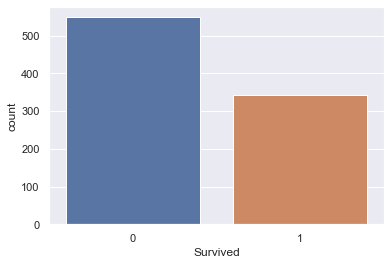

In [21]:
sns.countplot(x='Survived', data=df_train);

I'm trying to model that predicts whether or not somebody survives the Titanic based on the data. 

__Take-away:__ In the training set, less people survived than didn't. Now I want to build a toy model that nobody survived. 

This is a _bad model_, I know that people survived. But it gives me a baseline that I can work with. Any model that I create needs to be better than this one.

In [29]:
df_test['Survived'] = 0
# .to_csv doesn't produce more than one with the same name, AND overwrites
df_test[['PassengerId', 'Survived']].to_csv('data/predictions/no_survivors.csv', 
                                            index = False)



In [30]:
bad_model = pd.read_csv(os.path.join('data', 'predictions', 'no_survivors.csv'))

In [31]:
bad_model.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,0
9,901,0
